In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Anshuman.csv')

# Display the first few rows of the DataFrame
df.head()


,created_at,entry_id,Temperature,Humidity,Water level,NPK_soil,Soil Moisture
0,2025-01-03T09:12:57+00:00,1,30.6,38.8,NaN,NaN,NaN
1,2025-01-03T09:13:18+00:00,2,30.5,43.2,NaN,NaN,NaN
2,2025-01-03T09:13:39+00:00,3,30.4,43.1,NaN,NaN,NaN
3,2025-01-03T09:14:00+00:00,4,30.3,43.1,NaN,NaN,NaN
4,2025-01-03T09:14:21+00:00,5,30.2,40.7,NaN,NaN,NaN


In [30]:
# Fill missing values in specific columns
df['Water level'] = df['Water level'].fillna(df['Water level'].mean())  # Replace with mean
df['Soil Moisture'] = df['Soil Moisture'].fillna(df['Soil Moisture'].median())  # Replace with median
df['NPK_soil'] = df['NPK_soil'].fillna(method='ffill')  # Forward fill

# Check if missing values are handled
print(df[['Water level', 'Soil Moisture', 'NPK_soil']].isnull().sum())


Water level       0
Soil Moisture     0
NPK_soil         21
dtype: int64


C:\Users\91979\AppData\Local\Temp\ipykernel_17984\3473731792.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['NPK_soil'] = df['NPK_soil'].fillna(method='ffill')  # Forward fill


In [32]:
# Forward fill missing values in 'NPK_soil'
df['NPK_soil'] = df['NPK_soil'].ffill()  # Forward fill

# Check if missing values are handled
print(df[['Water level', 'Soil Moisture', 'NPK_soil']].isnull().sum())


Water level       0
Soil Moisture     0
NPK_soil         21
dtype: int64


In [34]:
print(df.isnull().sum())


created_at        0
entry_id          0
Temperature       0
Humidity          0
Water level       0
NPK_soil         21
Soil Moisture     0
dtype: int64


In [40]:
import pandas as pd

# Load your data
df = pd.read_csv('Anshuman.csv')

# Fill missing values as you have done
df['Water level'] = df['Water level'].fillna(df['Water level'].mean())  # Replace with mean
df['Soil Moisture'] = df['Soil Moisture'].fillna(df['Soil Moisture'].median())  # Replace with median
df['NPK_soil'] = df['NPK_soil'].fillna(method='ffill')  # Forward fill

# Apply the soil condition classification
def classify_soil(row):
    if 1 < row['NPK_soil'] < 2.9:
        soil_condition = 'Good Condition'
    else:
        soil_condition = 'Polluted (Requires Urea, Potash, Potassium Sulphate)'

    if row['Water level'] < 20:
        water_condition = 'Water Required'
    else:
        water_condition = 'Sufficient Water'

    if 5 <= row['Soil Moisture'] <= 15:
        moisture_condition = 'Soil Moisture Medium'
    else:
        moisture_condition = 'Soil Moisture Not Optimal'

    if row['Temperature'] < 30:
        temperature_condition = 'Good Temperature'
    else:
        temperature_condition = 'Water Required'

    if row['Humidity'] < 40:
        humidity_condition = 'Most Favorable'
    else:
        humidity_condition = 'Water Required'

    return pd.Series([soil_condition, water_condition, moisture_condition, temperature_condition, humidity_condition])

# Apply classification function
df[['Soil Condition', 'Water Condition', 'Moisture Condition', 'Temperature Condition', 'Humidity Condition']] = df.apply(classify_soil, axis=1)

# Show the classified results
print(df[['NPK_soil', 'Water level', 'Soil Moisture', 'Temperature', 'Humidity', 
          'Soil Condition', 'Water Condition', 'Moisture Condition', 'Temperature Condition', 'Humidity Condition']].head())


   NPK_soil  Water level  Soil Moisture  Temperature  Humidity  \
0       NaN       6.2375            5.0         30.6      38.8   
1       NaN       6.2375            5.0         30.5      43.2   
2       NaN       6.2375            5.0         30.4      43.1   
3       NaN       6.2375            5.0         30.3      43.1   
4       NaN       6.2375            5.0         30.2      40.7   

                                      Soil Condition Water Condition  \
0  Polluted (Requires Urea, Potash, Potassium Sul...  Water Required   
1  Polluted (Requires Urea, Potash, Potassium Sul...  Water Required   
2  Polluted (Requires Urea, Potash, Potassium Sul...  Water Required   
3  Polluted (Requires Urea, Potash, Potassium Sul...  Water Required   
4  Polluted (Requires Urea, Potash, Potassium Sul...  Water Required   

     Moisture Condition Temperature Condition Humidity Condition  
0  Soil Moisture Medium        Water Required     Most Favorable  
1  Soil Moisture Medium        Water

C:\Users\91979\AppData\Local\Temp\ipykernel_17984\1420773590.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['NPK_soil'] = df['NPK_soil'].fillna(method='ffill')  # Forward fill


Accuracy: 100.00%
Confusion Matrix:
[[9 0]
 [0 9]]


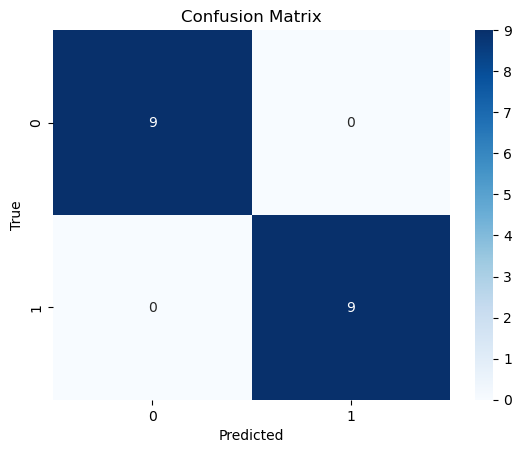

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define the target and features
X = df[['NPK_soil', 'Water level', 'Soil Moisture', 'Temperature', 'Humidity']]  # Features
y = df['Soil Condition']  # You can change 'Soil Condition' to any other target column, like 'Water Condition'

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [44]:
# Define a function to generate recommendations
def generate_recommendation(row):
    recommendations = []
    
    # NPK Condition
    if 1 <= row['NPK_soil'] <= 2.9:
        recommendations.append("Soil is in good condition.")
    else:
        recommendations.append("Soil is polluted. Add Urea, Potash, and Potassium Sulphate.")
    
    # Water Level Condition
    if row['Water level'] < 20:
        recommendations.append("Water required.")
    
    # Soil Moisture Condition
    if 5 <= row['Soil Moisture'] <= 15:
        recommendations.append("Soil moisture is medium.")
    
    # Temperature Condition
    if row['Temperature'] < 30:
        recommendations.append("Soil is in good condition.")
    else:
        recommendations.append("Water required due to high temperature.")
    
    # Humidity Condition
    if row['Humidity'] < 40:
        recommendations.append("Humidity is most favorable.")
    else:
        recommendations.append("Water required due to high humidity.")
    
    return " | ".join(recommendations)  # Combine all recommendations into a single string

# Apply the function to generate recommendations for each row
df['Recommendations'] = df.apply(generate_recommendation, axis=1)

# Display the updated DataFrame
print(df[['NPK_soil', 'Water level', 'Soil Moisture', 'Temperature', 'Humidity', 'Recommendations']])


    NPK_soil  Water level  Soil Moisture  Temperature  Humidity  \
0        NaN       6.2375            5.0         30.6      38.8   
1        NaN       6.2375            5.0         30.5      43.2   
2        NaN       6.2375            5.0         30.4      43.1   
3        NaN       6.2375            5.0         30.3      43.1   
4        NaN       6.2375            5.0         30.2      40.7   
..       ...          ...            ...          ...       ...   
82   1.64516       5.0000            5.0         30.5      40.3   
83   1.67742       5.0000            5.0         30.5      40.4   
84   1.70968       5.0000            5.0         30.5      40.5   
85   1.70968       5.0000            5.0         30.5      40.5   
86   1.74194       5.0000            5.0         30.5      40.5   

                                      Recommendations  
0   Soil is polluted. Add Urea, Potash, and Potass...  
1   Soil is polluted. Add Urea, Potash, and Potass...  
2   Soil is polluted. Add U